In [23]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from matplotlib import pyplot
%matplotlib inline

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [18]:
import os
os.chdir(r"C:\Users\Asus\Desktop\Data Science Master Program\004 ML Practise\001_SUPERVISED_LEARNING\001_REGRESSION\003_RIDGE_LASSO")
df = pd.read_csv("Load_Diabetes.csv")
df.head()

,AGE,SEX,BMI,BP,TC_TCells_WhiteBloodCells,LDL_LowDensityLipoproteins,HDL_HighDensityLipoproteins,TCH_ThyroidStimulatingHormone,LTG_Lamotrigine,GLU_BloodSugarLevel,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
AGE                              442 non-null int64
SEX                              442 non-null int64
BMI                              442 non-null float64
BP                               442 non-null float64
TC_TCells_WhiteBloodCells        442 non-null int64
LDL_LowDensityLipoproteins       442 non-null float64
HDL_HighDensityLipoproteins      442 non-null float64
TCH_ThyroidStimulatingHormone    442 non-null float64
LTG_Lamotrigine                  442 non-null float64
GLU_BloodSugarLevel              442 non-null int64
Y                                442 non-null int64
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [20]:
df.isnull().sum()

AGE                              0
SEX                              0
BMI                              0
BP                               0
TC_TCells_WhiteBloodCells        0
LDL_LowDensityLipoproteins       0
HDL_HighDensityLipoproteins      0
TCH_ThyroidStimulatingHormone    0
LTG_Lamotrigine                  0
GLU_BloodSugarLevel              0
Y                                0
dtype: int64

In [21]:
df.shape

(442, 11)

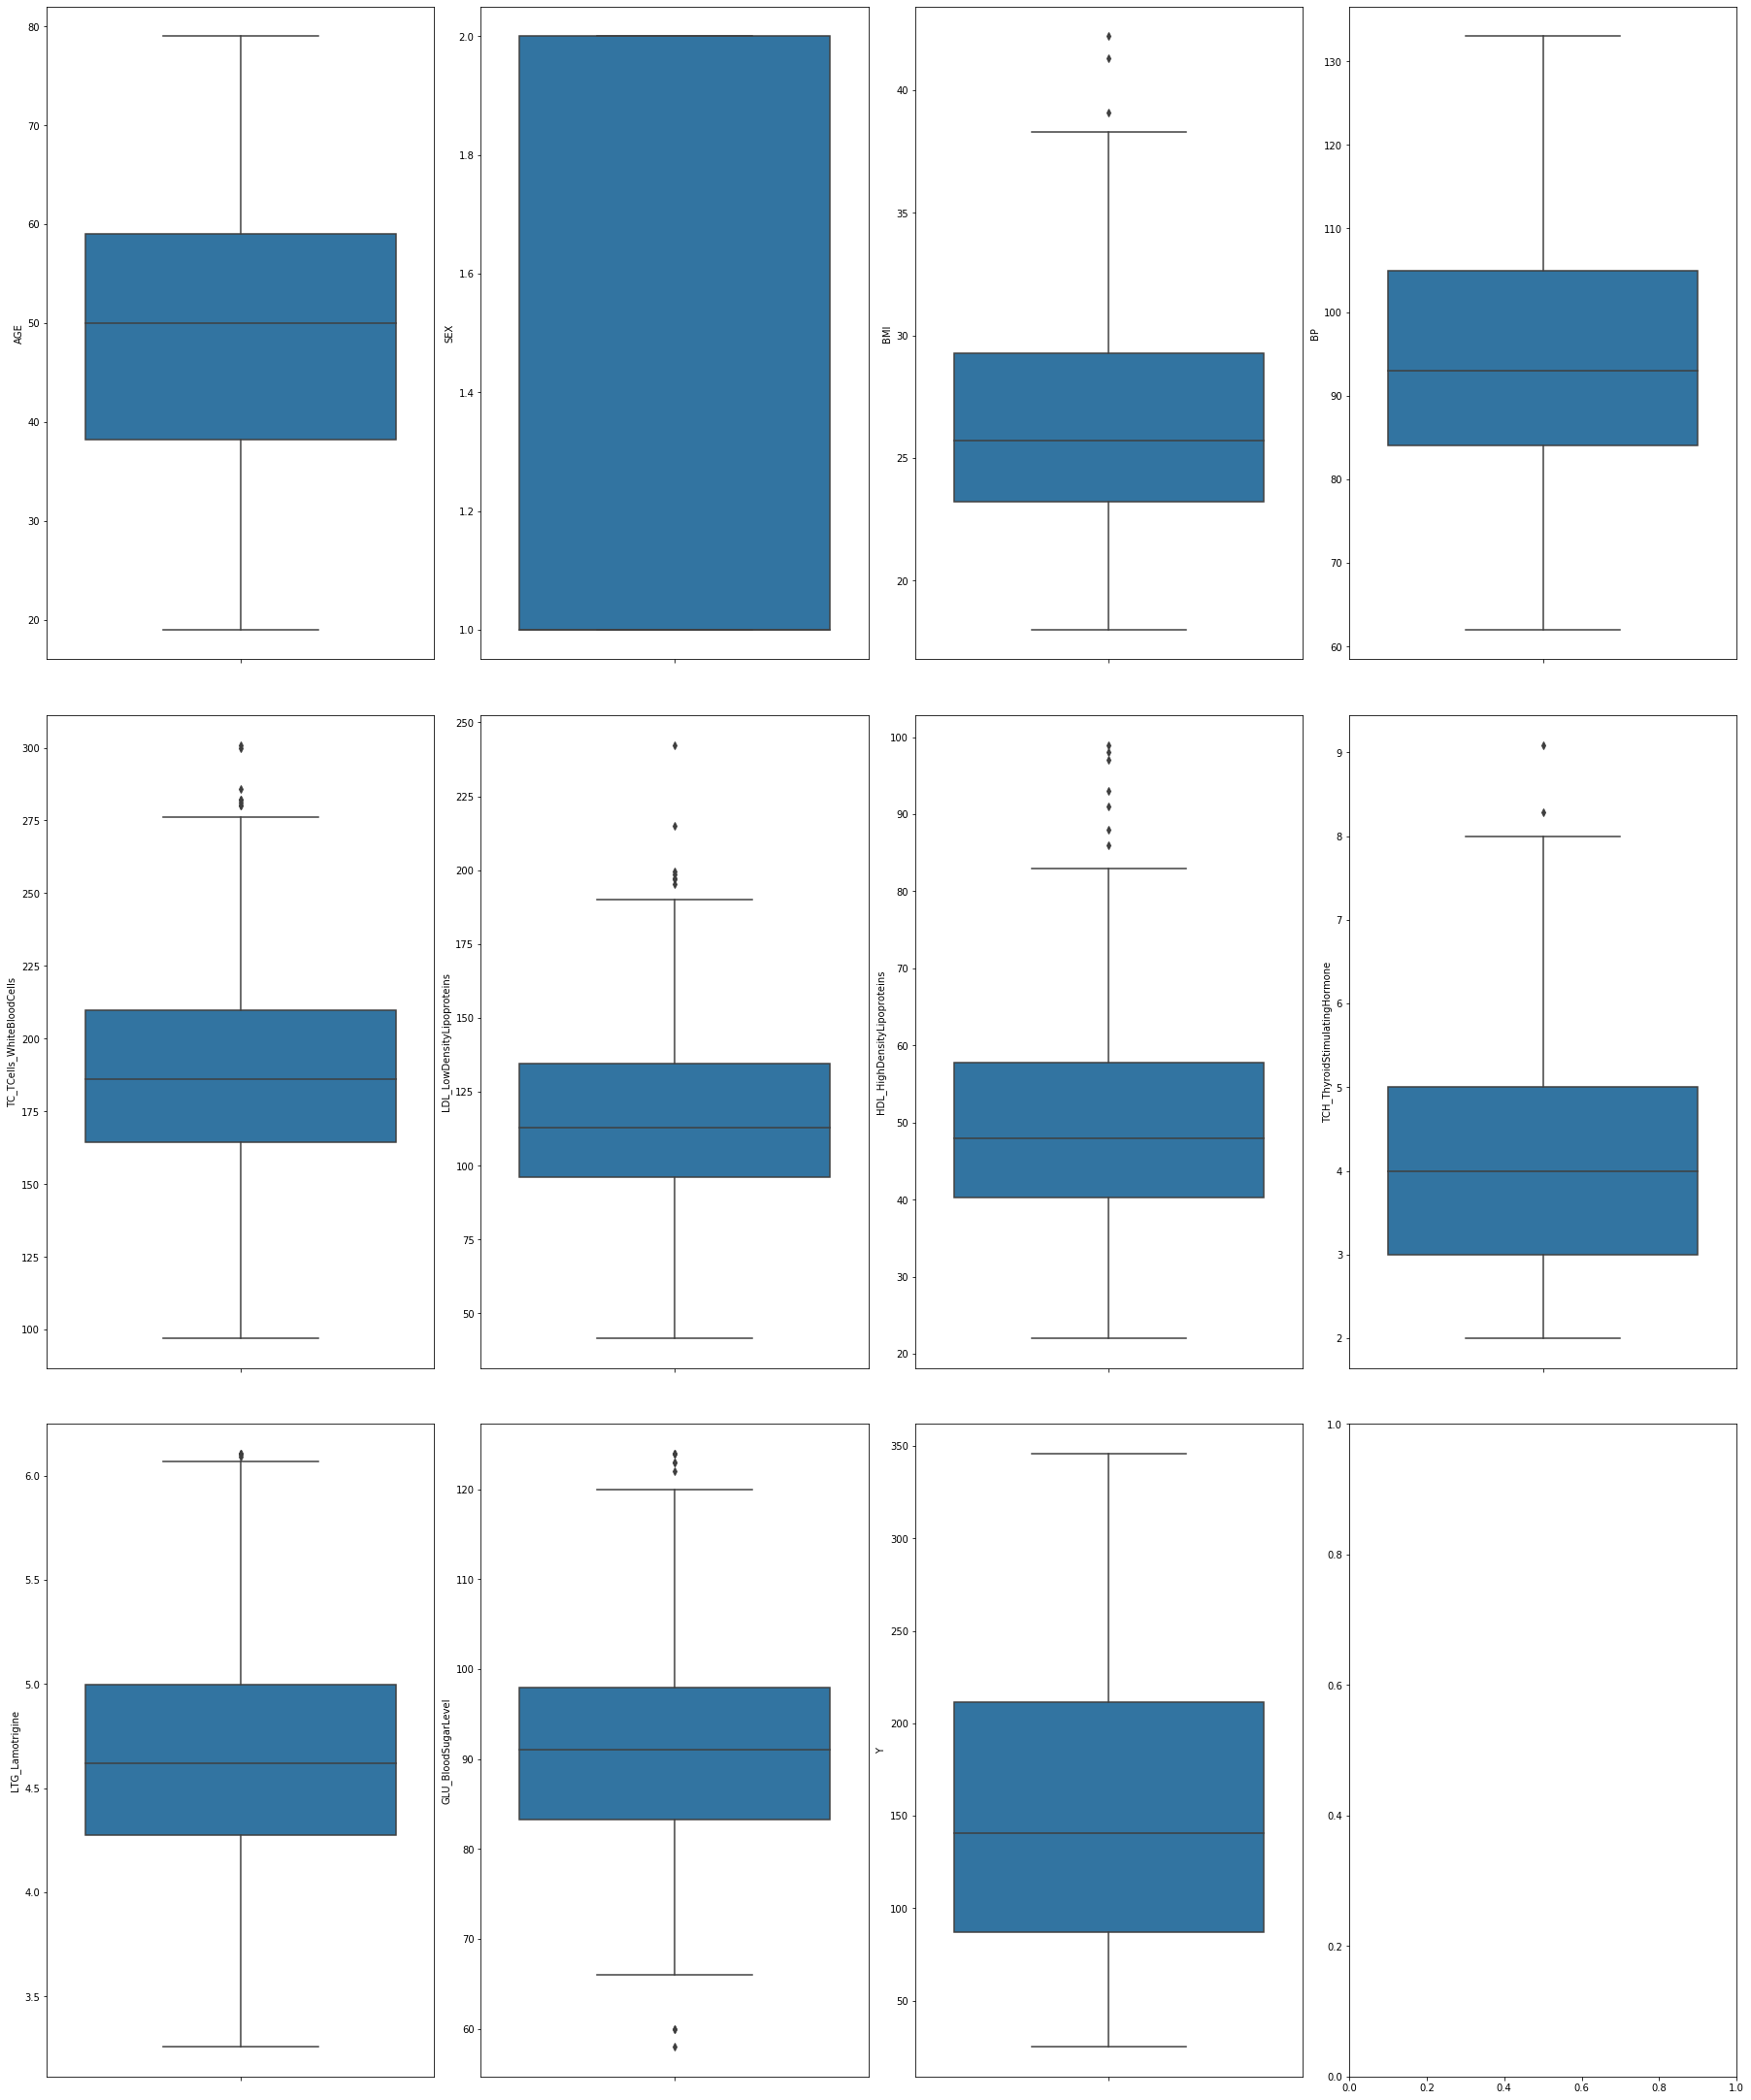

In [24]:
fig, ax = plt.subplots(ncols = 4, nrows = 3, figsize =(25,30))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

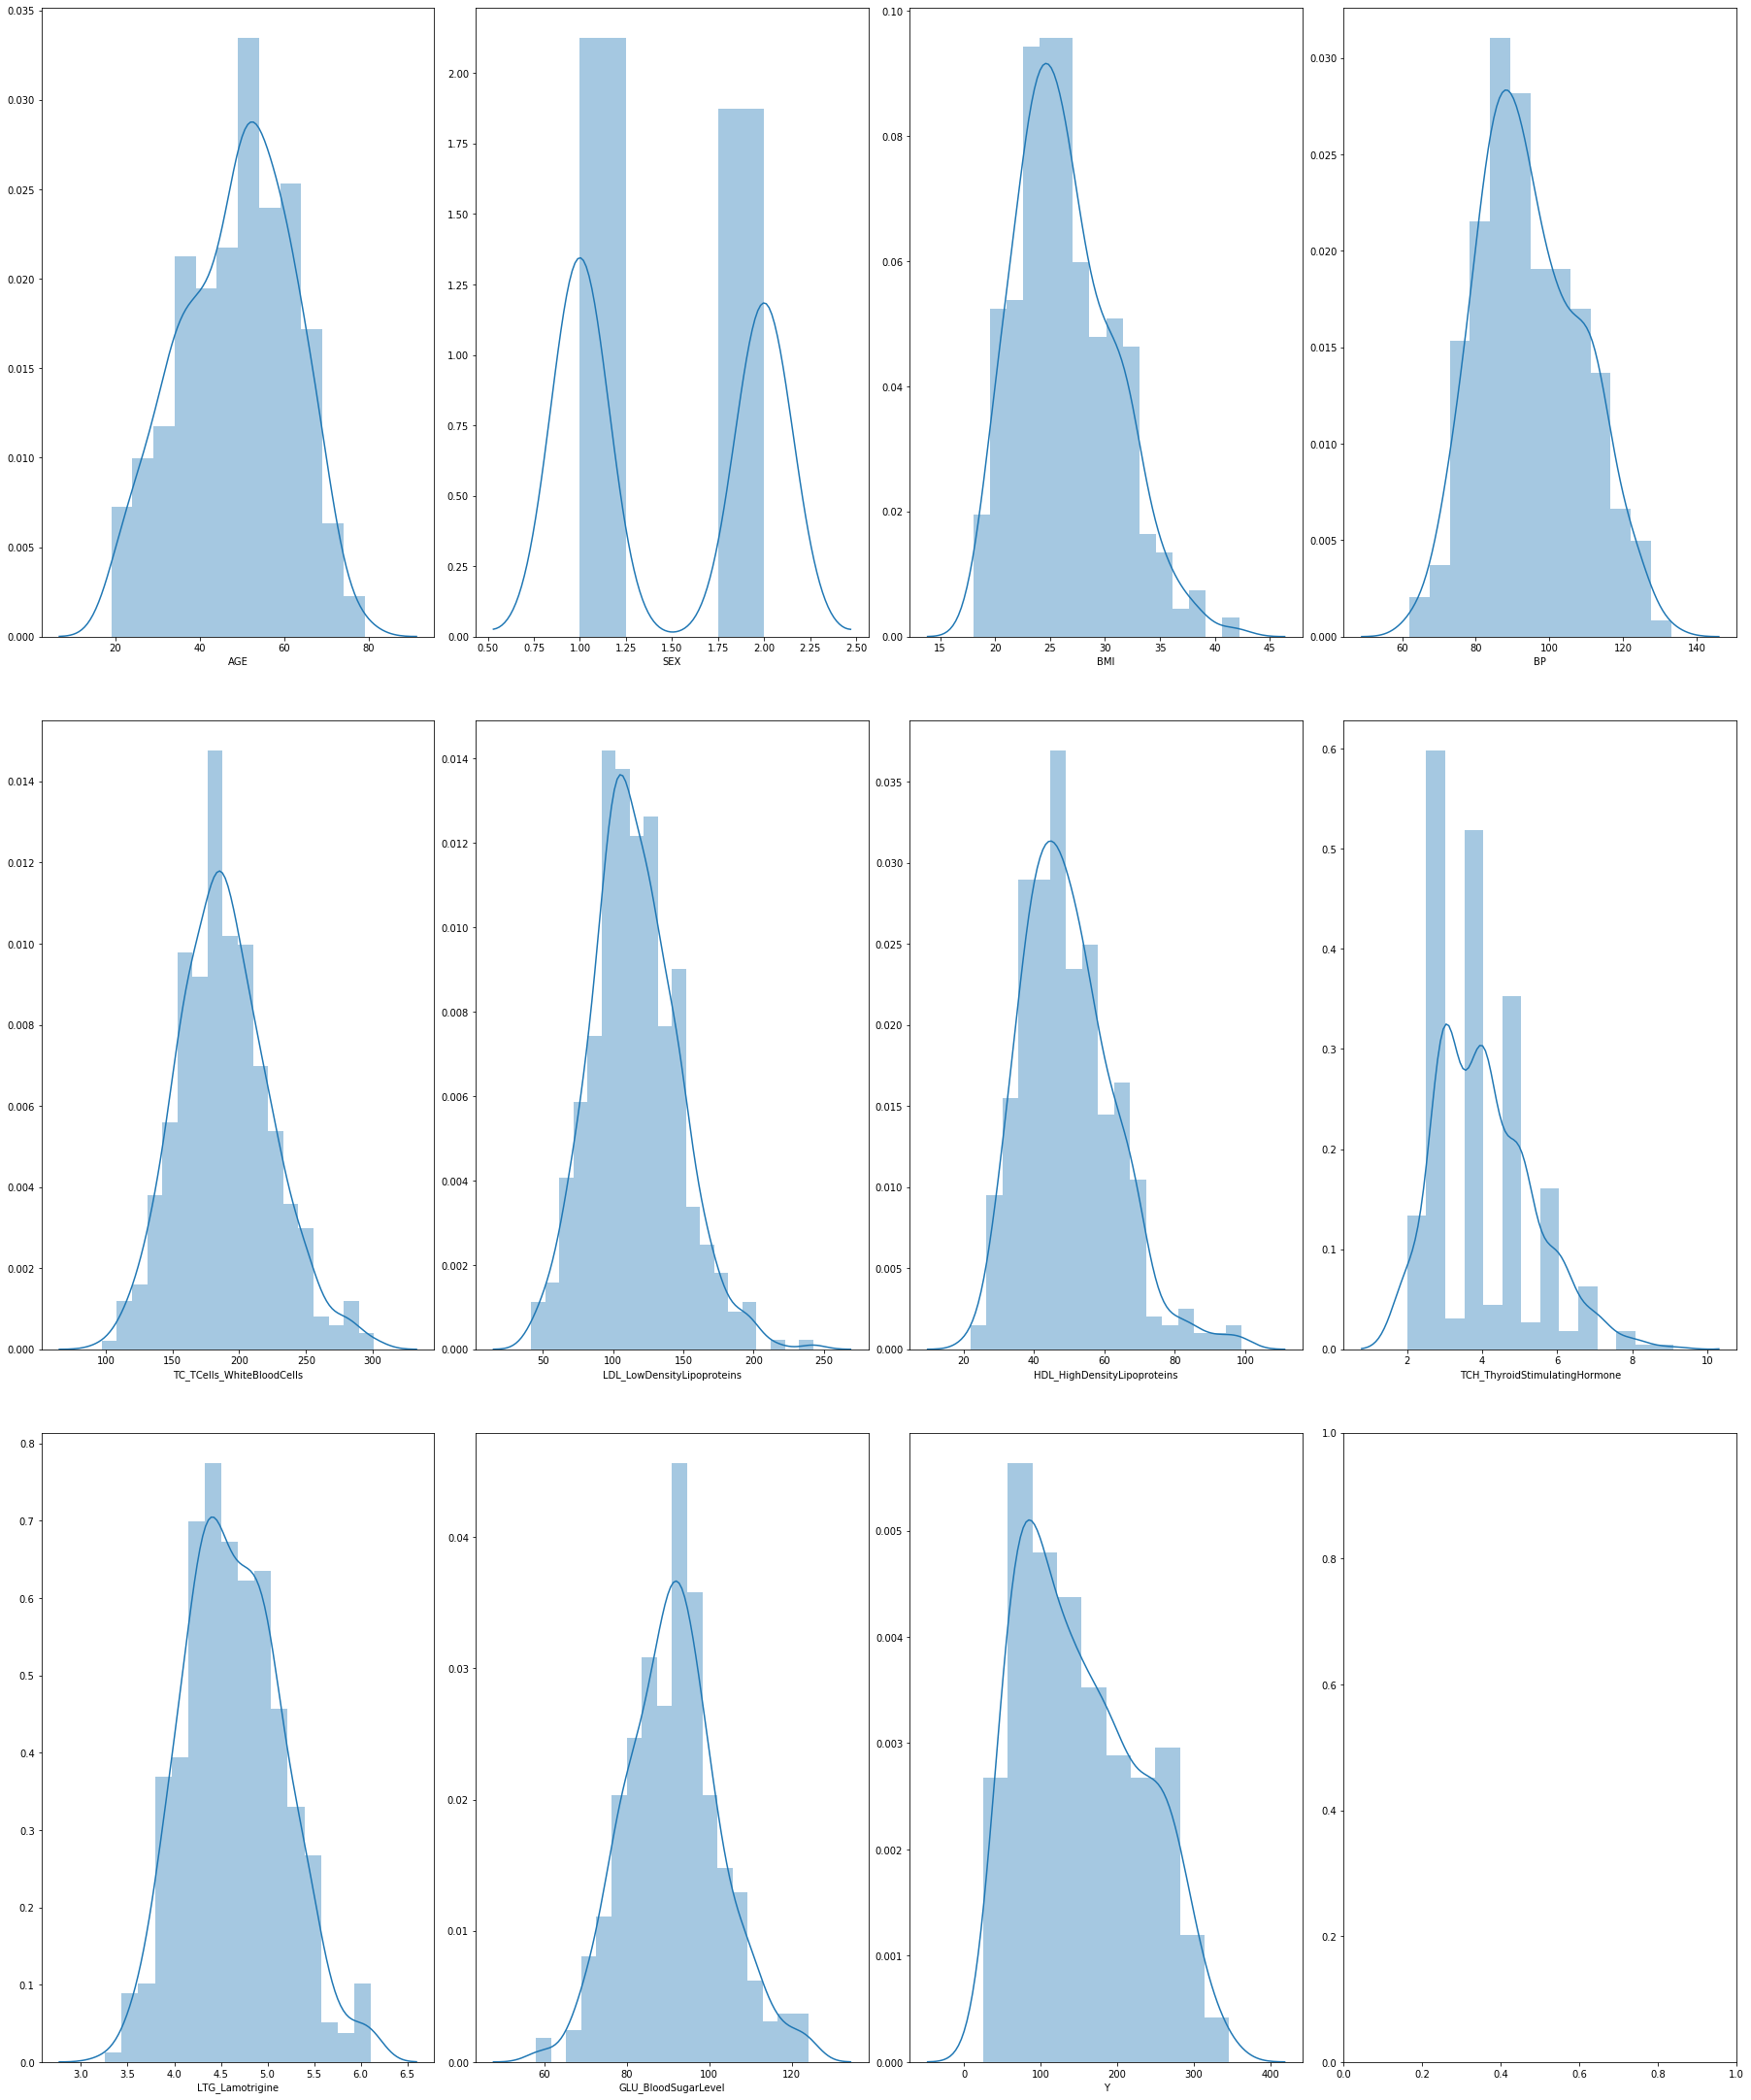

In [25]:
# CREATE DISTRIBUTION PLOT
fig, ax = plt.subplots(ncols = 4, nrows = 3, figsize =(25,30))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

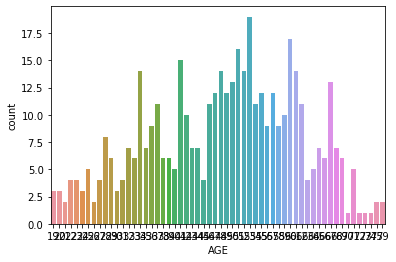

In [27]:
sns.countplot(df['AGE'])

In [38]:
len(df['Y'].unique())

214

In [39]:
df['Y'].value_counts()

200    6
72     6
178    5
71     5
90     5
      ..
199    1
201    1
208    1
209    1
25     1
Name: Y, Length: 214, dtype: int64

In [40]:
df.Y.unique()

array([151,  75, 141, 206, 135,  97, 138,  63, 110, 310, 101,  69, 179,
       185, 118, 171, 166, 144, 168,  68,  49, 245, 184, 202, 137,  85,
       131, 283, 129,  59, 341,  87,  65, 102, 265, 276, 252,  90, 100,
        55,  61,  92, 259,  53, 190, 142, 155, 225, 104, 182, 128,  52,
        37, 170,  71, 163, 150, 160, 178,  48, 270, 111,  42, 200, 113,
       143,  51, 210, 134,  98, 164,  96, 162, 279,  83, 302, 198,  95,
       232,  81, 246, 297, 258, 229, 275, 281, 173, 180,  84, 121, 161,
        99, 109, 115, 268, 274, 158, 107, 103, 272, 280, 336, 317, 235,
        60, 174, 126, 288,  88, 292, 197, 186,  25, 195, 217, 172, 214,
        70, 220, 152,  47,  74, 295, 127, 237,  64,  79,  91, 116,  86,
       122,  72,  39, 196, 222, 277,  77, 191,  73, 263, 248, 296,  78,
        93, 208, 108, 154, 124,  67, 257, 262, 177, 187, 125, 215, 303,
       243, 153, 346,  89,  50, 308, 145,  45, 264, 241,  66,  94, 230,
       181, 156, 233, 219,  80, 332,  31, 236, 253,  44, 114, 14

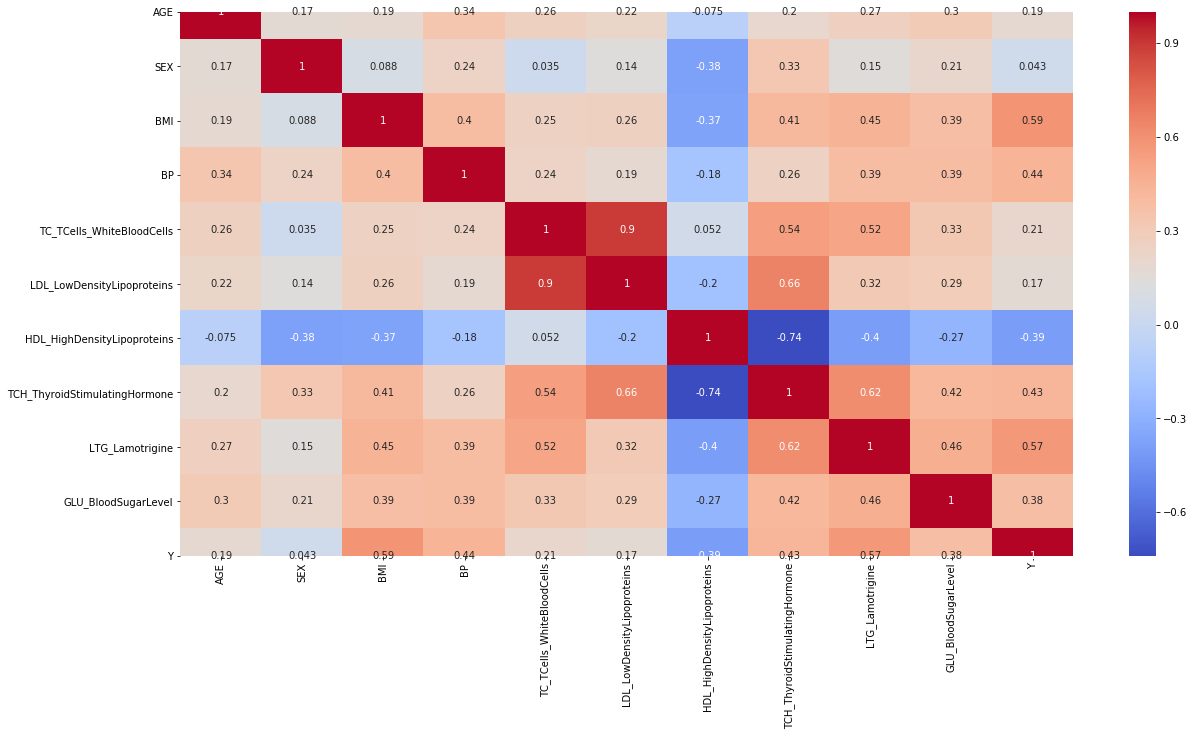

In [28]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [34]:
X = df.drop(columns=['Y'])
y = df['Y']

In [ ]:
# DATA IMBALANCEMENT TREATMENT
'''
!pip install imblearn
y.value_counts()
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors = 4)
# Transform the Dataset
X, y = oversample.fit_resample(X, y)
'''

###### MULTIPLE MODEL TRAINING

In [41]:
from sklearn.model_selection import cross_val_score, train_test_split

In [65]:
def classify(model, X, y): # Define a function < classify >
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 422)
    
    # TRAIN MODEL
    model.fit(x_train, y_train)
    print('ACCURACY', model.score(x_test, y_test) * 100)
    
    # CROSS VALIDATION
    score = cross_val_score(model, X, y, cv = 6)
    print('CV Score', np.mean(score) * 100)

######  LOGISTIC REGRESSION

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

ACCURACY 0.0
CV Score 0.6756756756756757


###### LINEAR REGRESSION

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
classify(model, X, y)

ACCURACY 51.74700671963952
CV Score 47.97786512010014


###### DECISION TREE

In [68]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

ACCURACY 0.0
CV Score 0.22522522522522523


###### RANDOM FOREST

In [69]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

ACCURACY 0.9009009009009009
CV Score 1.1384672343576452


###### EXTRA TREE CLASSIFIER

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

ACCURACY 0.9009009009009009
CV Score 1.1322966802418857


###### XG_BOOST

In [71]:
import xgboost as xgb
model = xgb.XGBClassifier()
classify(model, X, y)

[10:30:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ACCURACY 0.0
[10:31:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:31:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:31:10] WARNING: C:/Users/Administrator/workspace/x

###### LIGHT GBM

In [72]:
import lightgbm
model = lightgbm.LGBMClassifier()
classify(model, X, y)

ACCURACY 0.0
CV Score 1.3575219054671108


In [74]:
from sklearn.model_selection import train_test_split
X_trn, X_tst, y_trn, y_tst = train_test_split(X,
                                             y,
                                             test_size = 0.25,
                                             random_state = 422)

In [73]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

In [75]:
linReg.fit(X_trn, y_trn)

LinearRegression()

In [76]:
y_pred = linReg.predict(X_tst)

In [77]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2_Score: ", r2_score(y_tst, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_tst, y_pred)))

R2_Score:  0.5174700671963952
RMSE:  51.04855041661259


In [78]:
from sklearn.linear_model import Ridge
righ = Ridge(alpha = 0.0001)

In [79]:
righ.fit(X_trn, y_trn)

Ridge(alpha=0.0001)

In [80]:
y_pred1 = righ.predict(X_tst)

In [81]:
print("R2_Score: ", r2_score(y_tst, y_pred1))
print("RMSE: ", np.sqrt(mean_squared_error(y_tst, y_pred1)))

R2_Score:  0.5174701945850355
RMSE:  51.04854367816446


###### OBSERVATION HOW OVER-FITTING & UNDER-FITTING TAKES PLACE

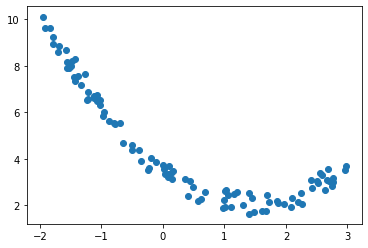

In [82]:
m = 100
x1 = 5 * np.random.rand(m, 1) -2
x2 = 0.7 * x1 ** 2 - 2 * x1 +3 +np.random.rand(m, 1)

plt.scatter(x1, x2)
plt.show()

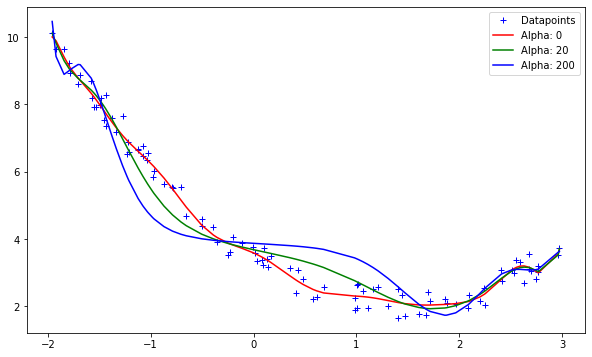

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree = 16)),
        ('ridge', Ridge(alpha = alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize = (10, 6))
plt.plot(x1, x2, 'b+', label = 'Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # plot
    plt.plot(sorted(x1[:, 0]), 
             preds[np.argsort(x1[:, 0])],
             c,
             label = 'Alpha: {}'.format(alpha))
    
plt.legend()
plt.show()